Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
1500/1500 [==============================] - 5s 3ms/sample - loss: 0.0338


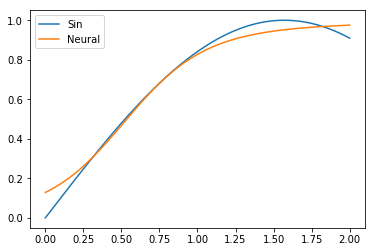

In [2]:
# В данном примере мы будем приблежать sin(x) на отрезке [0,2] при помощи нейросети 

# Импонтируем необходимые библеотеки
import numpy as np 
# numpy - библеотека питон для работы с тензорами,она должна быть вам знакома из курса ml
import matplotlib.pyplot as plt
#matplotlib - библеотека для вывода графиков,нужна для понятной интерпритации результатов
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
# keras - обертка над tensorflow,которая позволяет легко и быстро построить нейросеть практически любой архитектуры
# Нам необходимо 3 компонента keras : layer, oprimizer, models, эти компоненты содержат уже готовые шаблоны разных типов моделей,слоев,методов оптимизации



# создаем датасет
x=np.linspace(0,2,1500) # иницианализируем необходимое количество точек,в указаном отрезке,подробнее тут: https://numpy.org/devdocs/reference/generated/numpy.linspace.html
y = np.sin(x) # получаем массив значений синусов от массива x


model = models.Sequential() # создаем модель(экземпляр класса) типа Sequential
# Sequential - Последовательная модель представляет собой линейный стек слоев.
# Подробнее: https://keras.io/getting-started/sequential-model-guide/


model.add(layers.Dense(10,activation = 'sigmoid',input_dim=(1))) # добавляем слой типа Dense,указывая количество нейронов в слое,функцию активации,размерность входного массива
# Примеч. Сам входной слой указывать не нужно,достаточно на первом скрытом слое указать параметр input_dim и он будет создан автоматически
# Подробнее о слоях: https://keras.io/layers/core/


model.add(layers.Dense(1,activation = 'sigmoid')) # добавляем слой типа Dense,выходной слой
model.summary() #выводим информацию о модели

model.compile(loss="mean_squared_error", optimizer=optimizers.SGD(lr=5)) #компилируем  модель,указывая функцию потерь и метод оптимизации,lr - шаг обучения.
# Про все функции для экземпляра класса модель,в том числе compile,fit,predict можно прочесть тут: https://keras.io/models/model/
# Про виды ошибки,которые есть в keras можно прочесть тут: https://keras.io/losses/
# Про виды оптимизаторов,которые есть в keras можно прочесть тут: https://keras.io/optimizers/


model.fit(x,y,epochs= 1,batch_size=20,verbose=1) 
# обучаем,указывая:
# x - обучающие данные;
# y - верные ответы;
# количество эпох(сколько раз наша нейросеть будет обучаться на датасете раз);
# batch_size - указывает после сколько экземпляров x изменять значение весов;
# verbose - способ отображения обучения
result = model.predict(x)

#выводим график 
fig, ax = plt.subplots()
ax.plot(x, y,  label='Sin')
ax.plot(x, result, label='Neural')
leg = ax.legend()


# Если запускаете не в интерактивном режиме,как просто .py документ,то добавьте эти строчки,в конце 

In [0]:
fig.show()

print("для выхода нажмите enter")
input()

# Приближения этой же функции,с использованием rmsprop и binary_crossentropy,с небольшим  learning rate
<img src="https://psv4.userapi.com/c856416/u185357991/docs/d12/a513cb9067f2/Gifka.gif?extra=Sh5OZ7b0zJHozdvag9aLriz8d5_aq3OtsDjhquM8prCYUt-MffebZ9PHCdFcVGoqEO-V-bmWcznvI-gSVEaaXVIz861L5zPPPJaE9F3sFH_P9aprGAf8x5pKyLa7586QnzN0n62mf4s5_JEDuu_77w">